In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
input_folder = '~/workspace/ICWSM-maven/data'
output_folder = '../data/working'

# Exploration on News Dataset(01/13/2011~01/31/2011)

In [3]:
df1 = pd.read_csv('%s/MAINSTREAM_NEWS.csv' % input_folder, 
                names=['date', 'authors', 'links', 'title', 'content'],
                parse_dates=['date'])
# some cleanings 
df1.drop_duplicates('links', inplace=True) # remove the duplicates
df1.title = df1.title.str.replace(' - .*$', '') # remove the suffix website signiture, e.g. " - cnn.com"
df1.describe()

date               authors  \
count                  1609                   481   
unique                 1582                   362   
top     2011-02-11 01:24:07  The Associated Press   
freq                      4                    17   
first   2011-01-13 21:36:43                   NaN   
last    2011-02-14 22:52:15                   NaN   

                                                    links           title  \
count                                                1609            1609   
unique                                               1609            1202   
top     http://www.thisweeknews.com/live/content/bexle...  Yahoo! Answers   
freq                                                    1              45   
first                                                 NaN             NaN   
last                                                  NaN             NaN   

                                                  content  
count                                                1560  
unique                                               1429  
top     A fearful day in the clutches of Mubarak's bul...  
freq                                                    5  
first                                                 NaN  
last                                                  NaN

In [4]:
# explore the multiple links
# df1[df1.links.str.contains("\|")]

In [5]:
# explore the top domain
import urlparse

df1['domain'] = df1.links.apply(lambda x: urlparse.urlsplit(x).netloc if isinstance(x, str) else np.nan)
df1.domain.value_counts()

www.philly.com                    29
uk.answers.yahoo.com              26
kfyrtv.com                        24
article.wn.com                    23
www.dailymail.co.uk               21
au.answers.yahoo.com              18
www.boston.com                    18
sg.answers.yahoo.com              16
www.courierpostonline.com         15
ca.answers.yahoo.com              15
www.mlive.com                     15
ph.answers.yahoo.com              14
www.huffingtonpost.com            14
malaysia.answers.yahoo.com        13
www.examiner.com                  12
www.kansascity.com                12
ireport.cnn.com                   10
nz.answers.yahoo.com              10
www.northjersey.com               10
www.miamiherald.com                9
www.azcentral.com                  8
news.bbc.co.uk                     8
www.telegraph.co.uk                8
www.abc.net.au                     8
www.app.com                        8
www.washingtonpost.com             7
www.timesleader.com                7
w

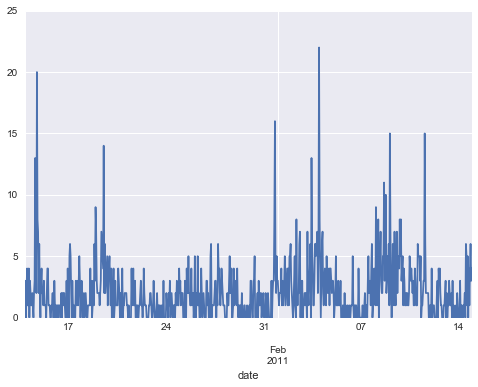

In [6]:
df1.index = df1.date
df1.resample('1H').size().plot()

## explore the top peak

In [7]:
from pandas.tseries.offsets import Hour
top_peak_time = df1.resample('1H').size().sort_values(ascending=False).index

**First peak**
Incident: A woman whose daughter was murdered after being stalked by an internet predator has called on social networking sites to better protect users.

Further reading: http://www.smh.com.au//breaking-news-national/grieving-mother-seeks-tougher-cyber-safety-20110203-1aevj.html

In [8]:
print top_peak_time[0]
t = df1[df1.date.dt.date == top_peak_time[0].date()].between_time(
    top_peak_time[0].time(), (top_peak_time[0] + Hour()).time())
t

2011-02-03 23:00:00


date                   authors  \
date                                                                
2011-02-03 23:03:28 2011-02-03 23:03:28                       NaN   
2011-02-03 23:04:48 2011-02-03 23:04:48                       NaN   
2011-02-03 23:05:13 2011-02-03 23:05:13                       NaN   
2011-02-03 23:08:29 2011-02-03 23:08:29                       AAP   
2011-02-03 23:14:51 2011-02-03 23:14:51                       NaN   
2011-02-03 23:15:32 2011-02-03 23:15:32                       NaN   
2011-02-03 23:15:50 2011-02-03 23:15:50                       NaN   
2011-02-03 23:15:54 2011-02-03 23:15:54                       NaN   
2011-02-03 23:16:00 2011-02-03 23:16:00                       NaN   
2011-02-03 23:16:02 2011-02-03 23:16:02                       NaN   
2011-02-03 23:16:50 2011-02-03 23:16:50                       NaN   
2011-02-03 23:16:53 2011-02-03 23:16:53                       NaN   
2011-02-03 23:23:14 2011-02-03 23:23:14                       NaN   
2011-02-03 23:29:56 2011-02-03 23:29:56  newsfeeds@nzherald.co.nz   
2011-02-03 23:33:04 2011-02-03 23:33:04                       NaN   
2011-02-03 23:34:14 2011-02-03 23:34:14               Chris Chase   
2011-02-03 23:38:22 2011-02-03 23:38:22                       NaN   
2011-02-03 23:43:47 2011-02-03 23:43:47                       NaN   
2011-02-03 23:46:01 2011-02-03 23:46:01                       NaN   
2011-02-03 23:49:47 2011-02-03 23:49:47                       NaN   
2011-02-03 23:53:53 2011-02-03 23:53:53                       NaN   
2011-02-03 23:54:12 2011-02-03 23:54:12  newsfeeds@nzherald.co.nz   

                                                                 links  \
date                                                                     
2011-02-03 23:03:28  http://www.theage.com.au/technology/technology...   
2011-02-03 23:04:48        http://waff.com/Global/story.asp?S=13964263   
2011-02-03 23:05:13        http://wect.com/Global/story.asp?S=13965925   
2011-02-03 23:08:29  http://www.cio.com.au/article/375509/grieving_...   
2011-02-03 23:14:51  http://www.cso.com.au/article/375509/grieving_...   
2011-02-03 23:15:32  http://www.computerworld.com.au/article/375509...   
2011-02-03 23:15:50  http://tallahassee.com/article/20110203/NEWS01...   
2011-02-03 23:15:54  http://www.statesman.com/sports/pro/steelers-b...   
2011-02-03 23:16:00  http://theithacajournal.com/article/20110203/N...   
2011-02-03 23:16:02  http://theithacajournal.com/article/20110203/B...   
2011-02-03 23:16:50  http://insideedition.com/news/5726/philadelphi...   
2011-02-03 23:16:53  http://insideedition.com/news/5706/terrifying-...   
2011-02-03 23:23:14  http://www.army.mil/-news/2011/02/03/51292-har...   
2011-02-03 23:29:56  http://www.nzherald.co.nz/nz/news/article.cfm?...   
2011-02-03 23:33:04  http://www.smh.com.au/technology/technology-ne...   
2011-02-03 23:34:14  http://sports.yahoo.com/nfl/blog/shutdown_corn...   
2011-02-03 23:38:22  http://philadelphia.cbslocal.com/2011/02/03/ex...   
2011-02-03 23:43:47  http://www.arnnet.com.au/index.php?id=12307337...   
2011-02-03 23:46:01  http://article.wn.com/view/2011/02/03/DeSean_J...   
2011-02-03 23:49:47  http://www.philly.com/r?19=961&43=165761&44=11...   
2011-02-03 23:53:53  http://www.computerworld.com.au/index.php?id=1...   
2011-02-03 23:54:12  http://www.nzherald.co.nz/business/news/articl...   

                                                                 title  \
date                                                                     
2011-02-03 23:03:28  What did you say about my son? Parents take re...   
2011-02-03 23:04:48  A new breed of bully: A WAFF 48 News special r...   
2011-02-03 23:05:13  New Hanover County schools host bullying workshop   
2011-02-03 23:08:29         Grieving mother seeks tougher cyber safety   
2011-02-03 23:14:51         Grieving mother seeks tougher cyber safety   
2011-02-03 23:15:32         Grieving mother seeks tougher cyber safety   
2011-02-0

**The second peak**
Incident: Florida officials have charged two girls, ages 12 and 14, with felonies for allegedly taunting and bullying another 12-year-old girl until she committed suicide.

Further reading: http://www.usatoday.com/story/news/nation/2013/10/15/florida-bullying-arrest-lakeland-suicide/2986079/

In [9]:
print top_peak_time[1]
t = df1[df1.date.dt.date == top_peak_time[1].date()].between_time(
    top_peak_time[1].time(), (top_peak_time[1] + Hour()).time())
t

2011-01-14 17:00:00


date               authors  \
date                                                            
2011-01-14 17:23:07 2011-01-14 17:23:07                   NaN   
2011-01-14 17:23:42 2011-01-14 17:23:42                   NaN   
2011-01-14 17:24:09 2011-01-14 17:24:09                   NaN   
2011-01-14 17:24:20 2011-01-14 17:24:20                   NaN   
2011-01-14 17:25:21 2011-01-14 17:25:21                   NaN   
2011-01-14 17:25:26 2011-01-14 17:25:26       By ESTHER AVILA   
2011-01-14 17:25:47 2011-01-14 17:25:47                   NaN   
2011-01-14 17:28:29 2011-01-14 17:28:29  The Associated Press   
2011-01-14 17:28:48 2011-01-14 17:28:48                   NaN   
2011-01-14 17:29:15 2011-01-14 17:29:15                   NaN   
2011-01-14 17:29:24 2011-01-14 17:29:24                   NaN   
2011-01-14 17:34:45 2011-01-14 17:34:45                   NaN   
2011-01-14 17:41:09 2011-01-14 17:41:09                   NaN   
2011-01-14 17:44:05 2011-01-14 17:44:05                   NaN   
2011-01-14 17:44:46 2011-01-14 17:44:46  The Associated Press   
2011-01-14 17:45:48 2011-01-14 17:45:48                   NaN   
2011-01-14 17:46:22 2011-01-14 17:46:22                   NaN   
2011-01-14 17:46:26 2011-01-14 17:46:26                   NaN   
2011-01-14 17:48:01 2011-01-14 17:48:01                   NaN   
2011-01-14 17:51:11 2011-01-14 17:51:11                   NaN   

                                                                 links  \
date                                                                     
2011-01-14 17:23:07  http://www.kansascity.com/2011/01/14/2583591/f...   
2011-01-14 17:23:42  http://us.rd.yahoo.com/dailynews/rss/tech/*htt...   
2011-01-14 17:24:09  http://www.heraldtribune.com/article/20110114/...   
2011-01-14 17:24:20  http://www.miamiherald.com/2011/01/14/2016134/...   
2011-01-14 17:25:21  http://www.ajc.com/news/nation-world/fla-teens...   
2011-01-14 17:25:26  http://www.recorderonline.com/news/school-4762...   
2011-01-14 17:25:47  http://www.kansascity.com/2011/01/14/2583591/f...   
2011-01-14 17:28:29  http://www.sunherald.com/2011/01/14/2778354/fl...   
2011-01-14 17:28:48      http://www.wftv.com/news/26494141/detail.html   
2011-01-14 17:29:15  http://www.sacbee.com/2011/01/14/3324310/fla-t...   
2011-01-14 17:29:24  http://www.kentucky.com/2011/01/14/1598847/fla...   
2011-01-14 17:34:45   http://www.startribune.com/nation/113610199.html   
2011-01-14 17:41:09  http://www.cbs47.tv:80/news/national/story/Tee...   
2011-01-14 17:44:05  http://www.vcstar.com/news/2011/jan/14/fla-tee...   
2011-01-14 17:44:46  http://www.signonsandiego.com/news/2011/jan/14...   
2011-01-14 17:45:48  http://www.charlotteobserver.com/2011/01/14/19...   
2011-01-14 17:46:22  http://www.thestate.com/2011/01/14/1645920/fla...   
2011-01-14 17:46:26            http://www.ksl.com?nid=157&sid=13998776   
2011-01-14 17:48:01  http://ca.answers.yahoo.com/question/index?qid...   
2011-01-14 17:51:11  http://www.13wham.com:80/news/national/story/T...   

                                                                 title  \
date                                                                     
2011-01-14 17:23:07  Fla. teens charged with Facebook bullying of girl   
2011-01-14 17:23:42  Fla. teens charged with Facebook bullying of girl   
2011-01-14 17:24:09  2 Estero teens charged in Facebook bullying ca...   
2011-01-14 17:24:20  Fla. teens charged with Facebook bullying of girl   
2011-01-14 17:25:21  Fla. teens charged with Facebook bullying of g...   
2011-01-14 17:25:26  Burton Middle School steps up to bullies | sch...   
2011-01-14 17:25:47  Fla. teens charged with Facebook bullying of girl   
2011-01-14 17:28:29  Fla. teens charged with Facebook bullying of girl   
2011-01-14 17:28:48      Teen Girls Charged With Felony Cyber Bullying   
2011-01-14 17:29:15  Fla. teens charged with Facebook bullying of girl   
2011-01-14 17:29:24  ESTERO, Fla.: Fla. teens charged with Facebook...   
2011-01-14 17

**The third peak**
Incident: A 13-year-old boy who was attacked while walking home from school earlier this month in a Philadelphia suburb said Tuesday that he had been bullied since the beginning of classes.

Further reading: http://www.cnn.com/2011/CRIME/02/01/pennsylvania.teen.beating/

In [10]:
print top_peak_time[2]
t = df1[df1.date.dt.date == top_peak_time[2].date()].between_time(
    top_peak_time[2].time(), (top_peak_time[2] + Hour()).time())
t

2011-01-31 19:00:00


date                           authors  \
date                                                                        
2011-01-31 19:01:25 2011-01-31 19:01:25              The Associated Press   
2011-01-31 19:02:37 2011-01-31 19:02:37                               NaN   
2011-01-31 19:06:16 2011-01-31 19:06:16                               NaN   
2011-01-31 19:09:57 2011-01-31 19:09:57                               NaN   
2011-01-31 19:14:13 2011-01-31 19:14:13                               NaN   
2011-01-31 19:18:49 2011-01-31 19:18:49                               NaN   
2011-01-31 19:26:46 2011-01-31 19:26:46                               NaN   
2011-01-31 19:30:48 2011-01-31 19:30:48                               NaN   
2011-01-31 19:34:22 2011-01-31 19:34:22                               NaN   
2011-01-31 19:34:27 2011-01-31 19:34:27                               NaN   
2011-01-31 19:36:34 2011-01-31 19:36:34                               NaN   
2011-01-31 19:42:36 2011-01-31 19:42:36                               NaN   
2011-01-31 19:45:20 2011-01-31 19:45:20  The Huffington Post News Editors   
2011-01-31 19:48:19 2011-01-31 19:48:19                       ADAM BENSON   
2011-01-31 19:55:31 2011-01-31 19:55:31                               NaN   
2011-01-31 19:55:44 2011-01-31 19:55:44                               NaN   

                                                                 links  \
date                                                                     
2011-01-31 19:01:25  http://www.signonsandiego.com/news/2011/jan/31...   
2011-01-31 19:02:37  http://www.ajc.com/news/nation-world/police-7-...   
2011-01-31 19:06:16  http://www.thenewstribune.com/2011/01/31/15247...   
2011-01-31 19:09:57  http://www.sacbee.com/2011/01/31/3365831/polic...   
2011-01-31 19:14:13  http://www.adelaidenow.com.au/news/national/ns...   
2011-01-31 19:18:49  http://www.daytondailynews.com/news/nation-wor...   
2011-01-31 19:26:46  http://www.thenewstribune.com/2011/01/31/15247...   
2011-01-31 19:30:48  http://www.gosanangelo.com/news/2011/jan/31/no...   
2011-01-31 19:34:22  http://www.boston.com/news/nation/articles/201...   
2011-01-31 19:34:27  http://us.rd.yahoo.com/dailynews/rss/crime/*ht...   
2011-01-31 19:36:34  http://www.miamiherald.com/2011/01/31/2043483/...   
2011-01-31 19:42:36  http://www.star-telegram.com/2011/01/31/281044...   
2011-01-31 19:45:20  http://www.huffingtonpost.com/2011/01/31/upper...   
2011-01-31 19:48:19  http://www.norwichbulletin.com/homepage/x19209...   
2011-01-31 19:55:31  http://www.edsonleader.com/ArticleDisplay.aspx...   
2011-01-31 19:55:44  http://www.stltoday.com/news/national/article_...   

                                                                 title  \
date                                                                     
2011-01-31 19:01:25  Police: 7 Pa. H.S. students arrested for bullying   
2011-01-31 19:02:37  Police: 7 Pa. H.S. students arrested for bully...   
2011-01-31 19:06:16  Police: 7 Pennsylvania high school students ar...   
2011-01-31 19:09:57  Police: 7 Pa. H.S. students arrested for bullying   
2011-01-31 19:14:13  Taxpayers' $2.5m bill for bullying |  Adelaide...   
2011-01-31 19:18:49  Police: 7 Pa. H.S. students arrested for bullying   
2011-01-31 19:26:46  Police: 7 Pennsylvania high school students ar...   
2011-01-31 19:30:48                                        No headline   
2011-01-31 19:34:22  Police: 7 Pa. H.S. students arrested for bullying   
2011-01-31 19:34:27  Police: 7 Pa. H.S. students arrested for bullying   
2011-01-31 19:36:34  Police: 7 Pa. H.S. students arrested for bullying   
2011-01-31 19:42:36  Police: 7 Pa. H.S. students arrested for bully...   
2011-01-31 19:45:20  7 Upper Darby High School Students Arrested Fo...   
2011-01-31 19:48:19  Montville superintendent says bullying not beh...   
2011-01-31 19:55:31  Anti-bullying bylaw, borrowing discussed by co...   
2011-01-31 19:55:44  Police: 7 Pa. H.S. students arrested

Explore important phrases - mined in "SegPhrase"

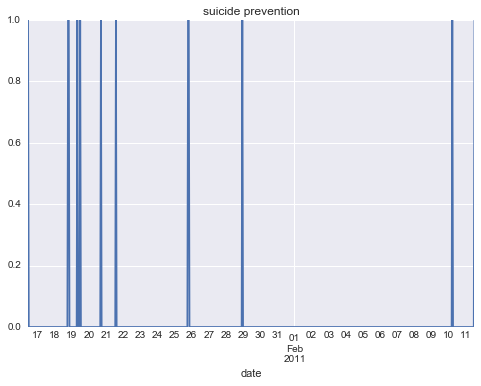

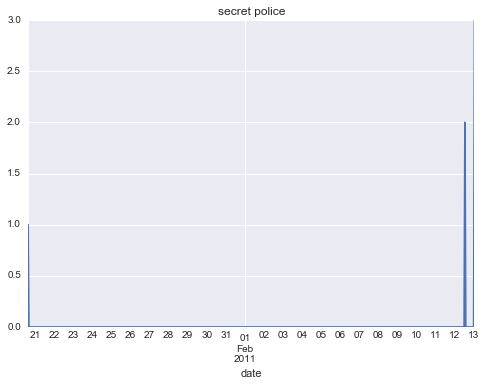

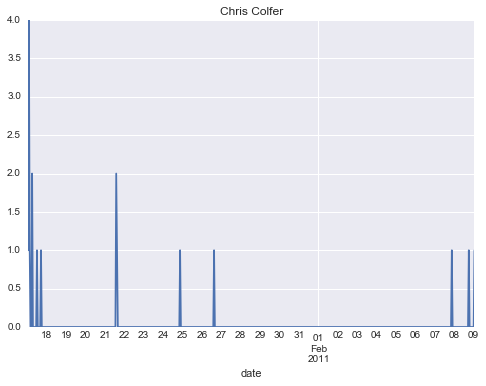

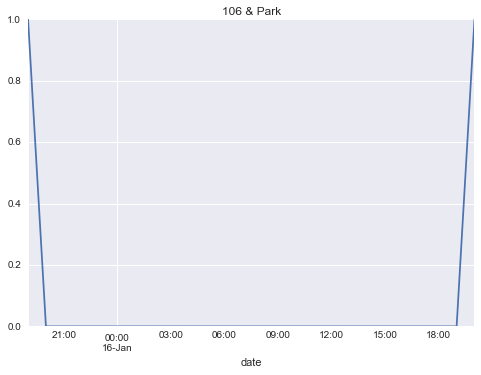

In [11]:
memes = ["suicide prevention", 
        "secret police", 
        "Chris Colfer", 
        "106 & Park"]
for meme in memes:
    plt.figure()
    t = df1[df1.content.str.lower().str.contains(meme.lower())==True]
    t.resample('1H').size().plot(title=meme)

## Word Usage

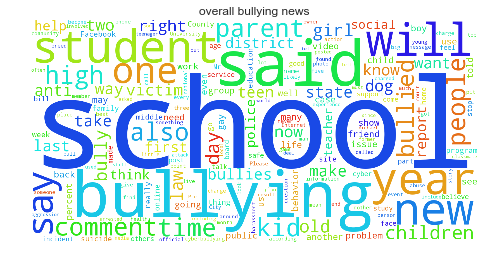

In [12]:

from wordcloud import WordCloud, STOPWORDS
def plot_word_cloud(text, ax):
    no_urls_no_tags = " ".join([word for word in text.split(" ")
                                if "http" not in word and not word.startswith("@") and word != "RT"
                                ])
    stopwords = STOPWORDS.union(["RT", "amp"])

    word_cloud = WordCloud(
        width=1600, height=800,
        stopwords=stopwords,
        background_color="white"
    ).generate(no_urls_no_tags)
    ax.imshow(word_cloud)
    ax.set_axis_off()
    return ax

plt.figure()
plot_word_cloud(df1.content.str.cat(sep=' '), plt.gca())
plt.title('overall bullying news')

In [13]:
# explore important phrases
df1.content.to_csv('/u/z/h/zhangwei/workspace/NLP/SegPhrase-master/data/ICWSM11/news.csv', header=False, index=False)

# Exploration on Social Media Dataset(01/14/2011~01/20/2011)

In [14]:
df2 = pd.read_csv('%s/SOCIAL_MEDIA.csv' % input_folder, 
                names=['date', 'authors', 'links', 'content'],
                parse_dates=['date'])
df2 = df2.drop_duplicates('links') # remove the duplicates
df2.describe()

date     authors  \
count                 46188       45961   
unique                44628       41429   
top     2011-02-10 04:30:27  FriendFeed   
freq                     14         176   
first   2011-01-13 21:08:00         NaN   
last    2011-02-14 23:58:33         NaN   

                                                    links  \
count                                               46188   
unique                                              46188   
top     http://facebook.com/post/?id=791183568_1873966...   
freq                                                    1   
first                                                 NaN   
last                                                  NaN   

                                                  content  
count                                               46188  
unique                                              34450  
top     I'm a little boy with glasses, the one they ca...  
freq                                                  757  
first                                                 NaN  
last                                                  NaN

## Temporal aspects

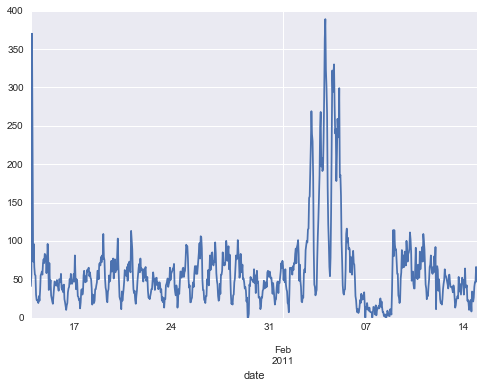

In [15]:
df2.index = df2.date
df2.resample('1H').size().plot()

Word cloud among all posts

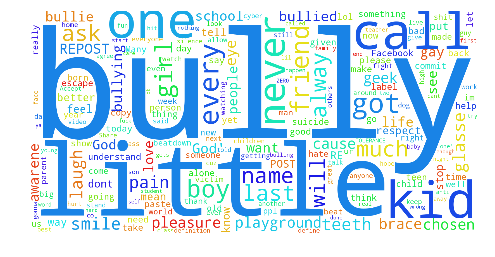

In [16]:
plt.figure()
plot_word_cloud(df2.content.str.cat(sep=' '), plt.gca())

## explore the top peak

Take a look at the content of the most frequently mentioned posts. 

In [17]:
df2.content.value_counts()

I'm a little boy with glasses, the one they call a geek; a little girl who never smiles cause I've got braces on my teeth. I'm that kid on every playground who is always chosen last; you don't have to be my friend, but is it too much to ask: don't laugh at me, don't call me names, don't get your pleasure from my pain? In God's eyes we're all the same. REPOST for bully awareness                                         757
I'm a little boy with glasses, the one they call a geek; a little girl who never smiles cause I've got braces on my teeth. I'm that kid on every playground who is always chosen last; you don't have to be my friend, but is it too much to ask: don't laugh at me, don't call me names, don't get your pleasure from my pain! In the eyes of God we're all the same. ♥ ~ REPOST for BULLY AWARENESS                                303
I'm a little boy with glasses, the one they call a geek; a little girl who never smiles cause I've got braces on my teeth. I'm that kid on every playg

Explore the temporal espects for some popular memes

/afs/cs.wisc.edu/u/z/h/zhangwei/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


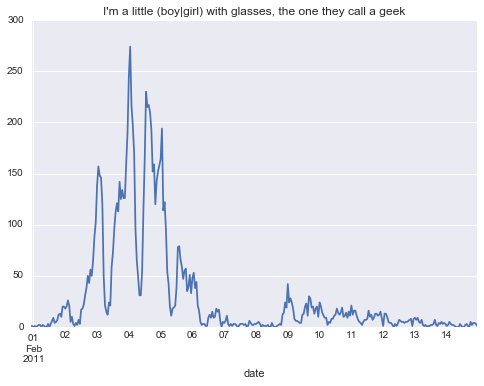

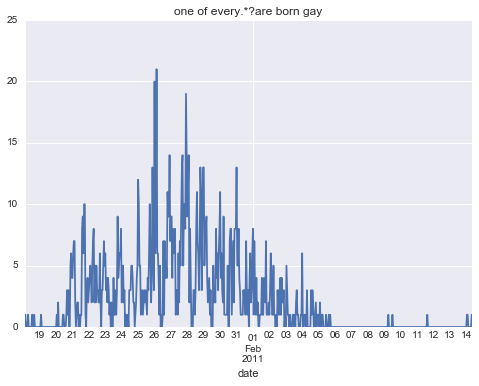

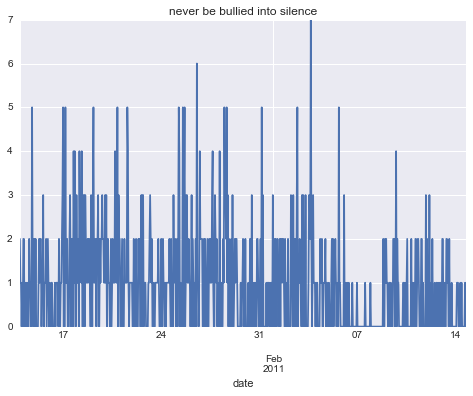

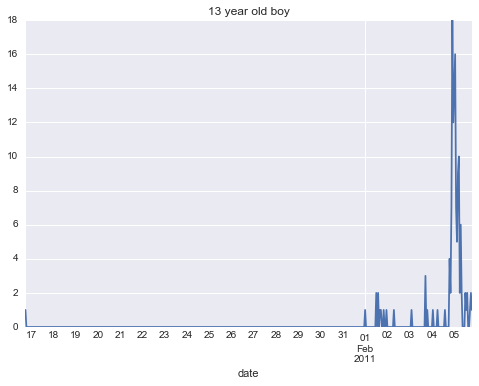

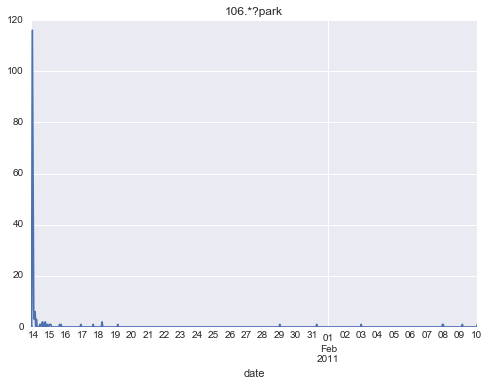

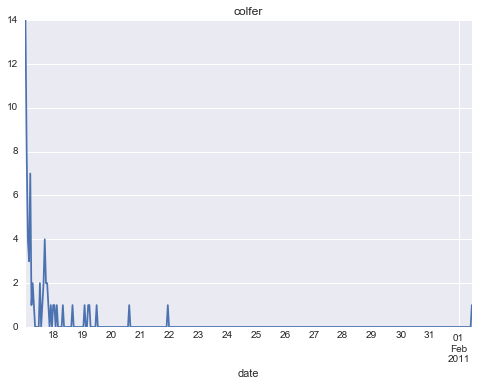

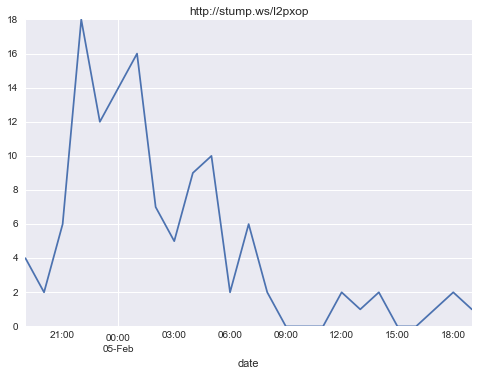

In [18]:
memes = ["I'm a little (boy|girl) with glasses, the one they call a geek", 
        "one of every.*?are born gay", 
        "never be bullied into silence", 
        "13 year old boy", 
        "106.*?park",
        "colfer", 
        "http://stump.ws/l2pxop"]
for meme in memes:
    plt.figure()
    t = df2[df2.content.str.contains(meme, case=False)]
    t.resample('1H').size().plot(title=meme)

## posts with urls

In [36]:
import urlparse

url_pattern = r'((http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?)'
t = df2.content.str.extract(url_pattern, expand=True)[0]
df2['url'] = t
df2['url_domain'] = df2.url.apply(lambda x: urlparse.urlsplit(x).netloc if isinstance(x, str) else np.nan)
t = df2[~df2.url.isnull()]

Find if there is any repeating urls

In [37]:
t.url.value_counts()

http://stump.ws/l2pxop                                                                                                                                                                                                            122
http://bit.ly/eL2ZtY                                                                                                                                                                                                               42
http://www.facebook.com/pages/oCUzzIEZo-Recruitment-Page/179788898727804                                                                                                                                                           13
http://www.ebonyjet.com/culture/music/bulliesbeware.aspx                                                                                                                                                                           12
http://www.break.com/index/old-man-vs-bully-1996831                             

Take a look the content of posts with mostly used urls

In [38]:
t[t.url.isin(t.url.value_counts().index[:5])].sample(20)

date                        authors  \
date                                                                     
2011-01-31 07:57:17 2011-01-31 07:57:17                  Nelson Claire   
2011-02-04 22:25:35 2011-02-04 22:25:35              John Paul Codnita   
2011-02-05 00:01:15 2011-02-05 00:01:15                  Bill Thornton   
2011-01-31 07:47:43 2011-01-31 07:47:43                 Jenifer Alyson   
2011-01-31 07:48:59 2011-01-31 07:48:59              Liliana Charlotte   
2011-02-05 05:10:45 2011-02-05 05:10:45                  Aleesa Harris   
2011-02-05 01:54:47 2011-02-05 01:54:47                    Brooke Kidd   
2011-02-05 04:06:43 2011-02-05 04:06:43            Francisco Hernandez   
2011-01-31 07:38:45 2011-01-31 07:38:45                Crystal Abigale   
2011-02-04 22:22:54 2011-02-04 22:22:54  Prettyfacemockingbird Jackson   
2011-02-05 00:38:56 2011-02-05 00:38:56                Christian Silva   
2011-01-27 21:40:15 2011-01-27 21:40:15                    Frank Futta   
2011-02-01 12:34:41 2011-02-01 12:34:41           Full Court Press Amc   
2011-02-05 03:16:47 2011-02-05 03:16:47                    Frank Trejo   
2011-02-04 19:40:33 2011-02-04 19:40:33               Maverick Abulone   
2011-02-05 02:20:54 2011-02-05 02:20:54       Dayday SoHumble Robinson   
2011-02-05 07:05:23 2011-02-05 07:05:23                  Sherrita Polk   
2011-02-05 04:55:39 2011-02-05 04:55:39                     Nick Frisk   
2011-02-03 21:23:29 2011-02-03 21:23:29       Xayasit Dawe Saysipaseut   
2011-02-04 23:30:54 2011-02-04 23:30:54                   Bhavik Patel   

                                                                 links  \
date                                                                     
2011-01-31 07:57:17  http://facebook.com/post/?id=100001868028245_1...   
2011-02-04 22:25:35  http://facebook.com/post/?id=100000484016059_1...   
2011-02-05 00:01:15  http://facebook.com/post/?id=1273717884_124126...   
2011-01-31 07:47:43  http://facebook.com/post/?id=100001881768037_1...   
2011-01-31 07:48:59  http://facebook.com/post/?id=100001919838422_1...   
2011-02-05 05:10:45  http://facebook.com/post/?id=100001065429752_1...   
2011-02-05 01:54:47  http://facebook.com/post/?id=100000579770052_1...   
2011-02-05 04:06:43  http://facebook.com/post/?id=100000923655200_1...   
2011-01-31 07:38:45  http://facebook.com/post/?id=100001073727083_1...   
2011-02-04 22:22:54  http://facebook.com/post/?id=100001016781484_1...   
2011-02-05 00:38:56  http://facebook.com/post/?id=100001386391448_1...   
2011-01-27 21:40:15  http://facebook.com/post/?id=100001326953119_1...   
2011-02-01 12:34:41  http://facebook.com/post/?id=100000140227607_1...   
2011-02-05 03:16:47  http://facebook.com/post/?id=100001781020031_1...   
2011-02-04 19:40:33  http://facebook.com/post/?id=100000655680250_1...   
2011-02-05 02:20:54  http://facebook.com/post/?id=100000491713914_1...   
2011-02-05 07:05:23  http://facebook.com/post/?id=100000835725810_1...   
2011-02-05 04:55:39  http://facebook.com/post/?id=100000084966124_1...   
2011-02-03 21:23:29  http://facebook.com/post/?id=505606464_1398434...   
2011-02-04 23:30:54  http://facebook.com/post/?id=1429397278_152447...   

                                                               content  \
date                                                                     
2011-01-31 07:57:17  Hello, I am Wondering If You Dare To Get This ...   
2011-02-04 22:25:35  There is bullying.. and then there is what hap...   
2011-02-05 00:01:15  There is bullying.. and then there is what hap...   
2011-01-31 07:47:43  Hey, I am Wondering If You Dare To Get This Bu...   
2011-01-31 07:48:59  Wow, I am Wondering If You Dare To Get This Bu...   
2011-02-05 05:10:45  There is bullying.. and then there is what hap...   
2011-02-05 01:54:47  There is bullying.. and then there is what hap...   
2011-02-05 04:06:43  There is bullying.. and then there is what hap...   
2011-01-31 07:38:45  yeah, I am Wonde

Explore the distribution of the domains of the urls

In [39]:
t.url_domain.value_counts()

bit.ly                                         138
stump.ws                                       122
www.youtube.com                                 90
www.facebook.com                                63
apps.facebook.com                               56
t.co                                            54
ow.ly                                           33
tinyurl.com                                     16
www.break.com                                   15
www.datpiff.com                                 12
www.ebonyjet.com                                12
www.blogtalkradio.com                           12
lnk.ms                                           9
www.bbc.co.uk                                    9
www.stopbullyingnow.hrsa.gov                     9
www.mtv.com                                      9
www.comcast.net                                  9
www.365gay.com                                   8
www.culturebully.com                             8
goo.gl                         

## Bully traces

In [40]:
from subprocess import Popen, PIPE, STDOUT
lib_path = '../lib'

def bully_trace_classify(texts):
    p = Popen('java -jar %s/Enrichment.jar | java -jar %s/Classification.jar trace'
              % (lib_path, lib_path), 
              stdin=PIPE, stdout=PIPE, stderr=STDOUT,
              shell=True)
    return p.communicate(input='\n'.join(texts))[0].splitlines()

df2['trace'] = bully_trace_classify(df2.content)
df2.trace.replace({'no': 0, 'yes': 1}, inplace=True)

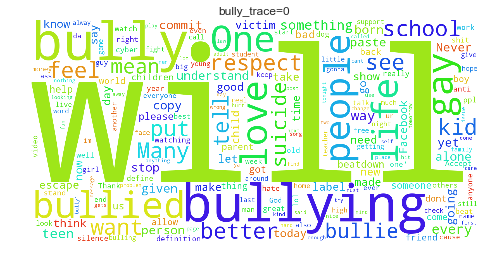

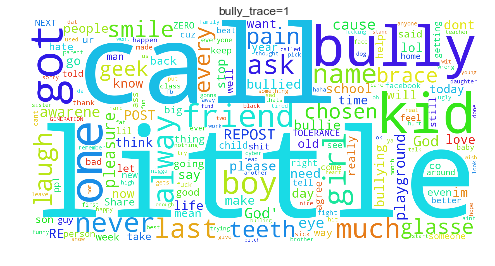

In [41]:
for i in [0, 1]:
    plt.figure()
    plot_word_cloud(df2[df2.trace==i].content.str.cat(sep=' '), plt.gca())
    plt.title('bully_trace=%d' % i)

Get a smaple for posts classified as bullying traces

In [42]:
t = df2[df2.trace==1].sample(100)
t.content

date
2011-02-04 13:35:29    I'm the little boy w glasses; the one they cal...
2011-02-02 20:29:51    I'm a little boy with glasses, the one they ca...
2011-02-02 18:16:17    I'm a little boy with glasses, the one they ca...
2011-02-04 15:26:35    I'm a little Boy with glasses, the one they ca...
2011-01-17 08:38:14    u kno lol in highschool i was a bully lmao tru...
2011-02-03 12:31:20    I'm a little boy with glasses, the one they ca...
2011-01-18 04:29:45    Oh fuck off pimples! u r a bully! G u gotta st...
2011-02-04 20:50:38    I'm a little boy with glasses, the one they ca...
2011-01-18 05:28:33    bullies do not rule they are cowards who pick ...
2011-02-09 21:29:14    got a call from Mr Musgrove today.  Travis and...
2011-01-13 23:41:24    ah dude killed hisself cuz he was gay, bullied...
2011-01-27 19:09:32    I just want to say that i am so proud of my li...
2011-01-15 18:42:27    to all the people that bully on facebook you n...
2011-02-04 02:04:37    Juss Came Frum Bball Pr

Remove the popular meme "I'm a little (boy|girl)"

In [43]:
t = df2[(df2.trace==1) & (df2.content.str.contains('little.*?with glasses')==False)].sample(100)
t.to_csv("~/temp.csv")
t.content

date
2011-01-20 06:55:23    Reading 'Keef' Richard's auto - got through bu...
2011-02-05 03:17:36    I'm a boy with glasses, the one they call a ge...
2011-01-28 00:29:29    - whenn i saww ur facee i saidd *( yourr datt ...
2011-01-28 17:54:31    Now you know you live in the woods when you se...
2011-01-19 22:54:16    I just love it when things work out and ppl fi...
2011-01-22 06:46:14    You know I came from a loving but screwy famil...
2011-01-24 18:39:42    U kno its funny wen u see niggas that use to t...
2011-01-26 21:44:34    I am researching and working on our Abuse, Bul...
2011-02-05 13:02:03    You know you are fat when your nephew says you...
2011-02-03 12:49:34    Everybody wants to say R.I.P for those that co...
2011-01-26 20:38:31    Bullies come in all shapes & sizes.  I underst...
2011-01-19 23:21:59    I see nothing wrong with his remarks. He's 100...
2011-01-27 04:26:12    Ok, Im all for stopping bullying in school, bu...
2011-02-03 05:55:53    I guess I'm just not on

Take a look at a sample of non bullying traces

In [44]:
df2[df2.trace==0].sample(100).content

date
2011-01-24 17:05:58    Am I the only 1 who feel some type of way by J...
2011-01-31 13:02:30    i f**king hate bullies, and especially when th...
2011-01-28 14:58:31    isnt  there supposed to be anti bullying thing...
2011-01-24 16:29:12    Asheville Lyric Opera presents: BRUNDIBAR, by ...
2011-02-10 07:04:28    this is 4 a low life whos not on facebook but ...
2011-01-19 03:36:54    Never be bullied into silence. Never allow you...
2011-01-29 07:48:55    One of every 10 ppl are born gay. That means 1...
2011-02-02 04:02:43    hell ws full so i m bck bullshit all dis old s...
2011-02-11 16:31:16    I see a lot of community activist in this case...
2011-02-11 15:13:10    Just found out that yesterday was National Sto...
2011-01-15 03:20:18    These girls jus got arrested for" facebook bul...
2011-01-29 14:13:17    This past month Pasco County had a young teen ...
2011-02-10 23:44:08    Shopping. Home ina few. School tomorrow. Skit ...
2011-01-31 17:36:01    One of every 10 people 

Remove the popular meme "one of 10 people are born gay."

In [45]:
df2[(df2.trace==0) & ~(df2.content.str.contains('born gay'))].sample(100).content

date
2011-01-31 18:19:30    y o y do ppl love to be bullies? y cant the bu...
2011-02-04 22:11:59    This Winds Getting Bullied Tomorrow Watch Am G...
2011-01-19 03:53:39    Watching Bully Beatdown. Drinking some juice. ...
2011-01-21 11:38:26    And we'll sing and we'll dance, and bid farewe...
2011-01-31 20:36:52    Chilling with my gawjus gurlss and dec! Haha B...
2011-02-03 22:35:25    Go Lashawn Jackson Took Football Jersey Off Hi...
2011-01-22 16:35:11    Great Minds TLC (Tutor & Life Coach) shared so...
2011-01-24 19:47:38    Will be bullying the gym later! Gonna have to ...
2011-02-02 09:50:21        How can we continue to support this bullying?
2011-01-28 01:24:28    And you wonder why there is hate towards bulli...
2011-02-07 23:19:54    My mommy made the best supper. now my sister n...
2011-02-08 15:51:02                          More bullying... | Facebook
2011-01-21 07:02:21    Bully Beatdown is my absolute FAVORITE show ri...
2011-01-29 14:45:57    Bullying and harassment